In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


[[1103.9918    224.65347 ]
 [1075.5249    658.0155  ]
 [ 465.33246   768.59705 ]
 [ 436.469     114.307686]]
[[ 436.469     114.307686]
 [ 436.469     658.0155  ]
 [1075.5249    658.0155  ]
 [1075.5249    114.307686]]
(4, 2)
(4, 2)


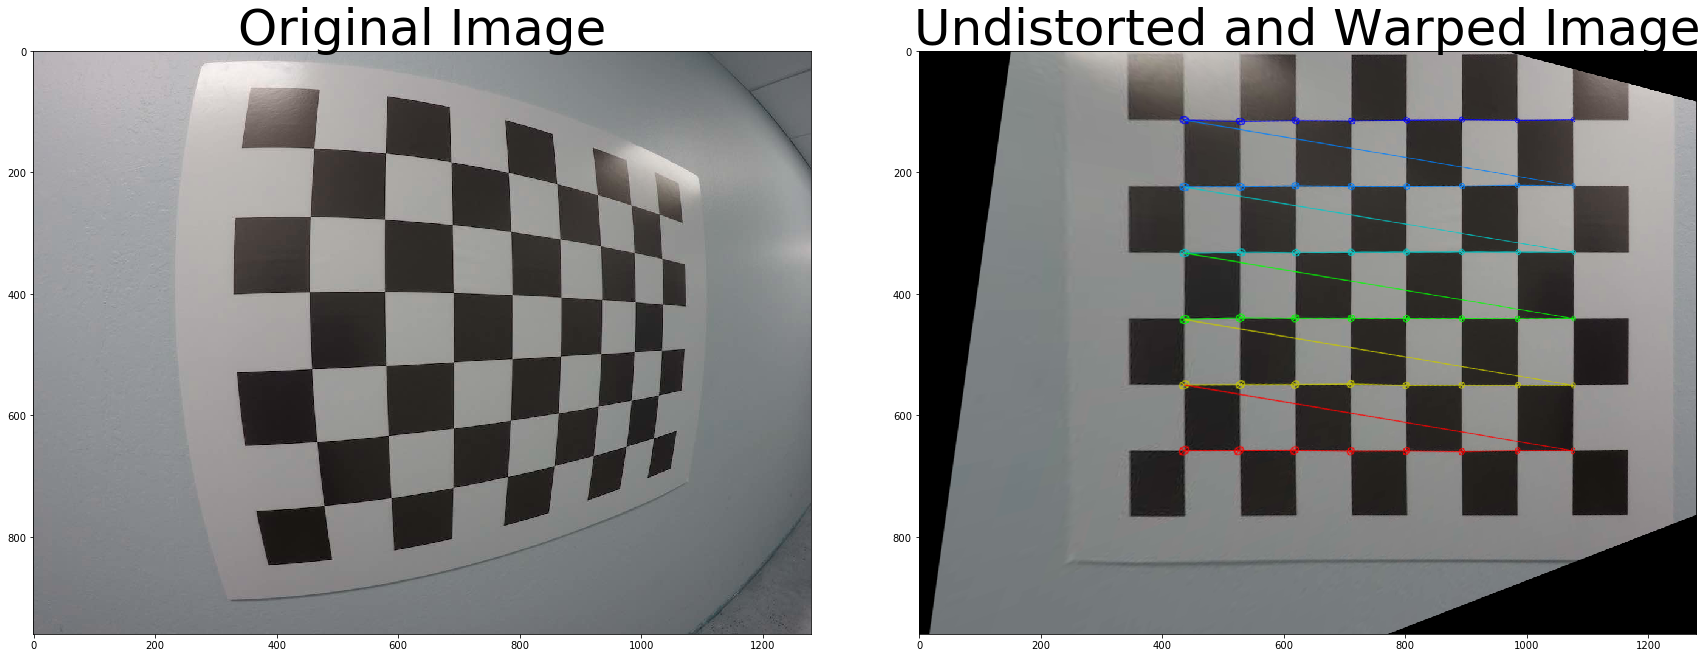

In [39]:

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ext, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    # 4) If corners found:
    if ext: 
            # a) draw corners
            cv2.drawChessboardCorners(undist, (nx,ny), corners, ext)
            cv2.imshow('image',undist)
            cv2.waitKey(500)
            cv2.destroyAllWindows()
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
            #print(corners.shape)
            src = np.array((corners[nx-1,:,:],corners[nx*ny-1,:,:],corners[nx*ny-nx,:,:],corners[0,:,:]))
            src = np.reshape(src,(4,-1))
            print(src)
            #print(src)
            
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            dst = np.array(([src[3,0],src[3,1]],[src[3,0],src[1,1]],[src[1,0],src[1,1]], [src[1,0],src[3,1]]))
            print(dst)
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            M = cv2.getPerspectiveTransform(src,dst)
            print(dst.shape)
            print(src.shape)
            # e) use cv2.warpPerspective() to warp your image to a top-down view
            warped = cv2.warpPerspective(undist, M, (1280,960), flags=cv2.INTER_LINEAR)
    #delete the next two lines
    #M = None
    #warped = np.copy(img) 
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)